ADVANCE MACHINE LEARNING

LAB-4

PRANSHU PARATE

202211063

CREDIT CARD FRAUD DETECTION

In [ ]:
#Importing the Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading the Dataset:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cc= pd.read_csv("/content/drive/Shareddrives/rs assignment1/creditcard.csv")

In [ ]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Class', ylabel='count'>

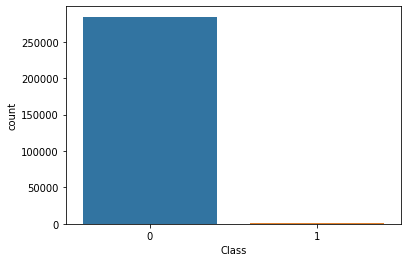

In [ ]:
import seaborn as sns
sns.countplot(data=cc, x='Class', order=cc['Class'].value_counts().index)

In [ ]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null value present.

In [ ]:
#Dependent Variable and Independent Variables:
X = cc.drop('Class', axis =1)
Y = cc['Class']

In [ ]:
#Splitting the Dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
#Scalling the Data:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

SVM Model:

In [ ]:
#Building the SVM Model:
#from sklearn.svm import SVC
#svm = SVC(kernel = 'linear', C= 1.0)
#svm.fit(X_train, Y_train)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, Y_train.ravel()) 

LinearSVC(random_state=0, tol=1e-05)

In [ ]:
#predicting the Label for Y_test:
Y_pred = clf.predict(X_test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:", confusion_matrix(Y_test, Y_pred))
print("Classification Report:", classification_report(Y_test,Y_pred))

Accuracy: 0.9992860737567735
Confusion Matrix: [[85294     5]
 [   56    88]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.61      0.74       144

    accuracy                           1.00     85443
   macro avg       0.97      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Logistic Regression:

In [ ]:
#Building the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Predictting the Label for Y_test:
Y_pred1 = lr.predict(X_test)

In [ ]:
#Printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_test, Y_pred1))
print("Confusion Matrix:", confusion_matrix(Y_test, Y_pred1))
print("Classification Report:", classification_report(Y_test,Y_pred1))

Accuracy: 0.9992977774656788
Confusion Matrix: [[85294     5]
 [   55    89]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.62      0.75       144

    accuracy                           1.00     85443
   macro avg       0.97      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Random Forest Classifier:

In [ ]:
#Building the Random Forest Classifier Model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#Predicting the Label for Y_test:
Y_pred2 = rf.predict(X_test)

In [ ]:
#Printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("Confusion Matrix:", confusion_matrix(Y_test, Y_pred2))
print("Classification Report:", classification_report(Y_test,Y_pred2))

Accuracy: 0.9996488887328394
Confusion Matrix: [[85298     1]
 [   29   115]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.99      0.80      0.88       144

    accuracy                           1.00     85443
   macro avg       1.00      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



Random Undersampling Technique:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Undersample the data
rus = RandomUnderSampler()
X_resampled, Y_resampled = rus.fit_resample(X,Y)

In [ ]:
#Splitting the Dataset:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_resampled, Y_resampled) 

In [ ]:
#Building the SVM Model:
#from sklearn.svm import SVC
#svm = SVC(kernel = 'linear', C= 1.0)
#svm.fit(X_Train, Y_Train)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_Train, Y_Train.ravel()) 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
#predicting the Label for Y_test:
Y_Pred = clf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred))
print("Classification Report:", classification_report(Y_Test,Y_Pred))

Accuracy: 0.6951219512195121
Confusion Matrix: [[134   0]
 [ 75  37]]
Classification Report:               precision    recall  f1-score   support

           0       0.64      1.00      0.78       134
           1       1.00      0.33      0.50       112

    accuracy                           0.70       246
   macro avg       0.82      0.67      0.64       246
weighted avg       0.80      0.70      0.65       246



In [ ]:
#Building the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_Train, Y_Train)

LogisticRegression()

In [ ]:
#Predictting the Label for Y_test:
Y_Pred1 = lr.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred1))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred1))
print("Classification Report:", classification_report(Y_Test,Y_Pred1))

Accuracy: 0.943089430894309
Confusion Matrix: [[127   7]
 [  7 105]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95       134
           1       0.94      0.94      0.94       112

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



In [ ]:
#Building the Random Forest Classifier Model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_Train,Y_Train)

RandomForestClassifier()

In [ ]:
#Predicting the Label for Y_test:
Y_Pred2 = rf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred2))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred2))
print("Classification Report:", classification_report(Y_Test,Y_Pred2))

Accuracy: 0.9471544715447154
Confusion Matrix: [[128   6]
 [  7 105]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.96      0.95       134
           1       0.95      0.94      0.94       112

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



SMOTE Technique:

In [ ]:
from imblearn.over_sampling import SMOTE
#SMOTE Oversampling:
seed = 100
k = 1
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, Y_res = sm.fit_resample(X, Y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_res)
X_res = scaling.transform(X_res)


In [ ]:
#Splitting the Dataset:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_res,Y_res) 

In [ ]:
#Building the SVM Model:
#from sklearn.svm import SVC
#svm = SVC(kernel = 'linear', C= 1.0)
#svm.fit(X_Train, Y_Train)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_Train, Y_Train.ravel()) 

LinearSVC(random_state=0, tol=1e-05)

In [ ]:
#predicting the Label for Y_test:
Y_Pred = clf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred))
print("Classification Report:", classification_report(Y_Test,Y_Pred))

Accuracy: 0.9723969104798885
Confusion Matrix: [[70445   692]
 [ 3232 67789]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     71137
           1       0.99      0.95      0.97     71021

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [ ]:
#Building the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_Train, Y_Train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predictting the Label for Y_test:
Y_Pred1 = lr.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred1))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred1))
print("Classification Report:", classification_report(Y_Test,Y_Pred1))

Accuracy: 0.9741273793947579
Confusion Matrix: [[70403   734]
 [ 2944 68077]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     71137
           1       0.99      0.96      0.97     71021

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [ ]:
#Building the Random Forest Classifier Model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_Train,Y_Train)

RandomForestClassifier()

In [ ]:
#Predicting the Label for Y_test:
Y_Pred2 = rf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred2))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred2))
print("Classification Report:", classification_report(Y_Test,Y_Pred2))

Accuracy: 0.9999226213086847
Confusion Matrix: [[71127    10]
 [    1 71020]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71137
           1       1.00      1.00      1.00     71021

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Random OverSampling Technique:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# Perform Random Over Sampling
ros = RandomOverSampler()
X_res, Y_res = ros.fit_resample(X,Y)

In [ ]:
#Splitting the Dataset:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_res,Y_res) 

In [ ]:
#Building the SVM Model:
#from sklearn.svm import SVC
#svm = SVC(kernel = 'linear', C= 1.0)
#svm.fit(X_Train, Y_Train)

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_Train, Y_Train) 

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
#Predictting the Label for Y_test:
Y_Pred1 = clf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred1))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred1))
print("Classification Report:", classification_report(Y_Test,Y_Pred1))

Accuracy: 0.8975998536839291
Confusion Matrix: [[69268  1593]
 [12964 58333]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.98      0.90     70861
           1       0.97      0.82      0.89     71297

    accuracy                           0.90    142158
   macro avg       0.91      0.90      0.90    142158
weighted avg       0.91      0.90      0.90    142158



In [ ]:
#Building the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_Train, Y_Train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predictting the Label for Y_test:
Y_Pred1 = lr.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred1))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred1))
print("Classification Report:", classification_report(Y_Test,Y_Pred1))

Accuracy: 0.9445194783269321
Confusion Matrix: [[68552  2309]
 [ 5578 65719]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95     70861
           1       0.97      0.92      0.94     71297

    accuracy                           0.94    142158
   macro avg       0.95      0.94      0.94    142158
weighted avg       0.95      0.94      0.94    142158



In [ ]:
#Building the Random Forest Classifier Model:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_Train,Y_Train)

RandomForestClassifier()

In [ ]:
#Predicting the Label for Y_test:
Y_Pred2 = rf.predict(X_Test)

In [ ]:
#printing the Accuracy, Confusion Matrix and Classification Report:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred2))
print("Confusion Matrix:", confusion_matrix(Y_Test, Y_Pred2))
print("Classification Report:", classification_report(Y_Test,Y_Pred2))

Accuracy: 0.9999577934411007
Confusion Matrix: [[70855     6]
 [    0 71297]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70861
           1       1.00      1.00      1.00     71297

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Class imbalance is a common problem in machine learning where the classes in the dataset are not represented equally. This can lead to biased models that have poor predictive performance on the minority class.

To address class imbalance, there are several techniques that can be used such as oversampling, undersampling, and generating synthetic samples. Additionally, using appropriate evaluation metrics such as AUC-ROC, precision-recall curve, and F1-score can help to better assess the performance of the model on imbalanced datasets.

It's also important to note that the best approach to dealing with class imbalance may depend on the specific characteristics of the dataset and the problem being addressed. Therefore, it's important to experiment with different techniques and evaluate the performance of the model carefully before making any conclusions.

In conclusion, class imbalance is a common problem in machine learning that requires careful consideration and appropriate techniques to address. By employing these techniques, we can develop more robust and accurate models that perform well on both majority and minority classes.